## Movie Review Classification
### Multiclass Classification
### Using Reuters Dataset

Build a network to classify Reuters newswires into 46 different mutually-exclusive topics.

In [2]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

len(train_data)
len(test_data)

2246

### Preparing the data

In [3]:
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# vectorized training data
x_train = vectorize_sequences(train_data)

# vectorized test data
x_test = vectorize_sequences(test_data)

Labels can be vectorized in two ways:
- Cast label list as integer tensor
- Use one-hot encoding


In [8]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# Our vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)
# Our vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)

### Building the network

In [10]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

- We are ending the network with a `Dense` layer of size 46. This means for each input sample, the network will output a 46-dimensional vector.
- The last layer uses a softmax activation. It means the network will output a probability distribution over 46 different output classes.

We have used the `categorical_crossentropy` as loss function which measures the distance between two probability distributions.

In [12]:
model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

### Validating the network

Set apart 1000 samples in training data to use as a validation set

In [16]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [23]:
history = model.fit(partial_x_train,
                   partial_y_train,
                    epochs = 8,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/8
16/16 [==============================] - 1s 30ms/step - loss: 0.0957 - accuracy: 0.9603 - val_loss: 1.0767 - val_accuracy: 0.8060
Epoch 2/8
16/16 [==============================] - 0s 20ms/step - loss: 0.1000 - accuracy: 0.9572 - val_loss: 1.1087 - val_accuracy: 0.8080
Epoch 3/8
16/16 [==============================] - 0s 20ms/step - loss: 0.0973 - accuracy: 0.9597 - val_loss: 1.0876 - val_accuracy: 0.8140
Epoch 4/8
16/16 [==============================] - 0s 20ms/step - loss: 0.0956 - accuracy: 0.9592 - val_loss: 1.0776 - val_accuracy: 0.8020
Epoch 5/8
16/16 [==============================] - 0s 20ms/step - loss: 0.0992 - accuracy: 0.9583 - val_loss: 1.0699 - val_accuracy: 0.8060
Epoch 6/8
16/16 [==============================] - 0s 22ms/step - loss: 0.0968 - accuracy: 0.9600 - val_loss: 1.1048 - val_accuracy: 0.7980
Epoch 7/8
16/16 [==============================] - 0s 19ms/step - loss: 0.0970 - accuracy: 0.9585 - val_loss: 1.0694 - val_accuracy: 0.8100
Epoch 8/8
16/16 [===

### Displaying loss and accuracy curves

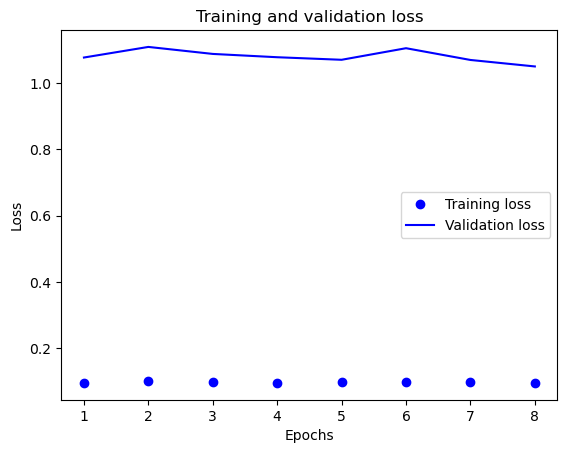

In [24]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

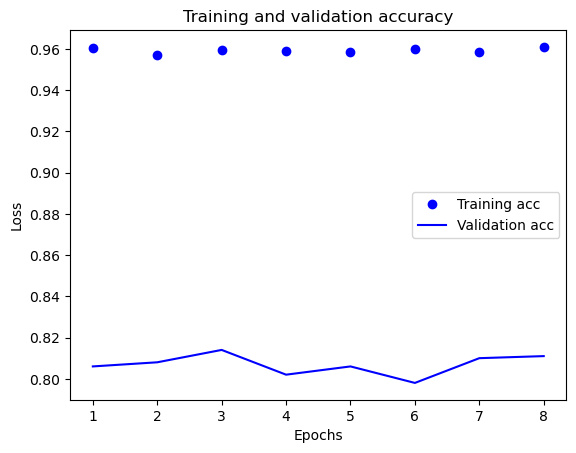

In [25]:
plt.clf()   # clear figure

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()